In [ ]:
# Import necessary libraries

In [ ]:
import pandas as pd  # For data manipulation and analysis

In [ ]:
import matplotlib.pyplot as plt  # For data visualization

In [ ]:
import seaborn as sns  # For enhanced data visualization

In [ ]:
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer  # To convert text into numerical data

In [ ]:
from sklearn.svm import SVC  # Support Vector Classifier for modeling

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation

In [ ]:
from sklearn.preprocessing import StandardScaler  # For feature scaling

In [ ]:
import scipy.sparse as sp  # For sparse matrix operations

In [ ]:
from wordcloud import WordCloud  # Import the WordCloud library

In [ ]:
from collections import Counter  # Import Counter for counting words

In [ ]:
# Load the dataset

In [ ]:
file_path = '/content/spam.csv'  # Define the file path for the dataset

In [ ]:
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Read the dataset into a DataFrame

In [ ]:
# Inspect the dataset

In [ ]:
print("First 5 rows of the dataset:")  # Print a message before displaying the first 5 rows
print(df.head(), '\n')  # Display the first 5 rows of the dataset

First 5 rows of the dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN   



In [ ]:
print("Dataset Info:")  # Print a message before displaying dataset info
print(df.info(), '\n')  # Display information about the dataset

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None 



In [ ]:
print("Summary Statistics:")  # Print a message before displaying summary statistics
print(df.describe(include='all'), '\n')  # Display summary statistics for all columns

Summary Statistics:
          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2   



In [ ]:
# Check for missing values

In [ ]:
missing_values = df.isnull().sum()  # Count missing values in each column

In [ ]:
print("Missing values in each column:")  # Print a message before displaying missing values
print(missing_values[missing_values > 0], '\n')  # Display columns with missing values

Missing values in each column:
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64 



In [ ]:
# Check for duplicates

In [ ]:
duplicates = df.duplicated().sum()  # Count the number of duplicate rows

In [ ]:
print(f"Number of duplicate rows: {duplicates}\n")  # Print the number of duplicates

Number of duplicate rows: 403



In [ ]:
# Check for unique values in each column

In [ ]:
unique_values = {col: df[col].unique() for col in df.columns}  # Store unique values for each column

In [ ]:
print("Unique values in each column:")  # Print a message before displaying unique values
for col, unique in unique_values.items():  # Iterate over columns and unique values
    print(f"{col}: {len(unique)} unique values\n")  # Display unique value counts for each column

Unique values in each column:
v1: 2 unique values

v2: 5169 unique values

Unnamed: 2: 44 unique values

Unnamed: 3: 11 unique values

Unnamed: 4: 6 unique values



In [ ]:
# Check for special characters in the messages

In [ ]:
special_characters = df['v2'].str.contains(r'[^a-zA-Z0-9\s]', regex=True).sum()  # Count messages with special characters


In [ ]:
print(f"Number of messages with special characters: {special_characters}\n")  # Print the count of special character messages


Number of messages with special characters: 5113



In [ ]:
# Clean the dataset

In [ ]:
df_cleaned = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])  # Drop unnecessary columns

In [ ]:
df_cleaned.columns = ['label', 'message']  # Rename columns for clarity

In [ ]:
df_cleaned['label'] = df_cleaned['label'].map({'ham': 0, 'spam': 1})  # Map labels to binary values

In [ ]:
# Eplanatory Data Analysis

In [ ]:
 # Create a count plot for labels

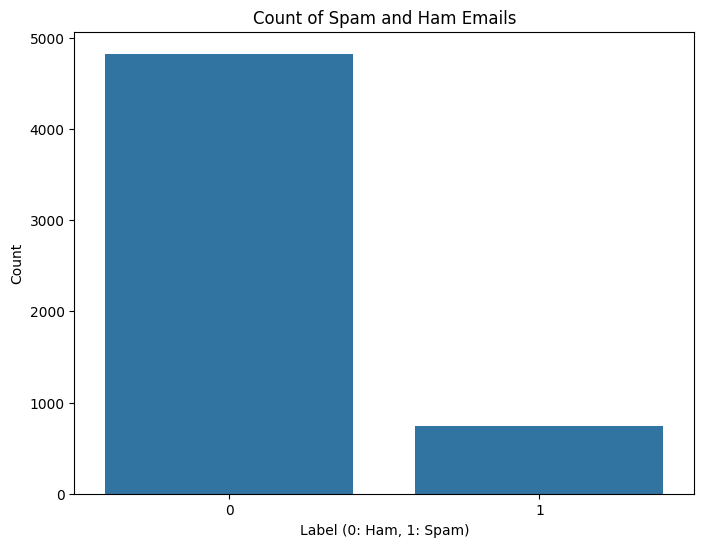

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.countplot(x='label', data=df_cleaned)  # Create a count plot for labels
plt.title('Count of Spam and Ham Emails')  # Set the title of the plot
plt.xlabel('Label (0: Ham, 1: Spam)')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.savefig('/content/spam_count_plot.pdf')  # Save the plot as a PDF
plt.show()  # Display the plot

In [ ]:
# Pie chart

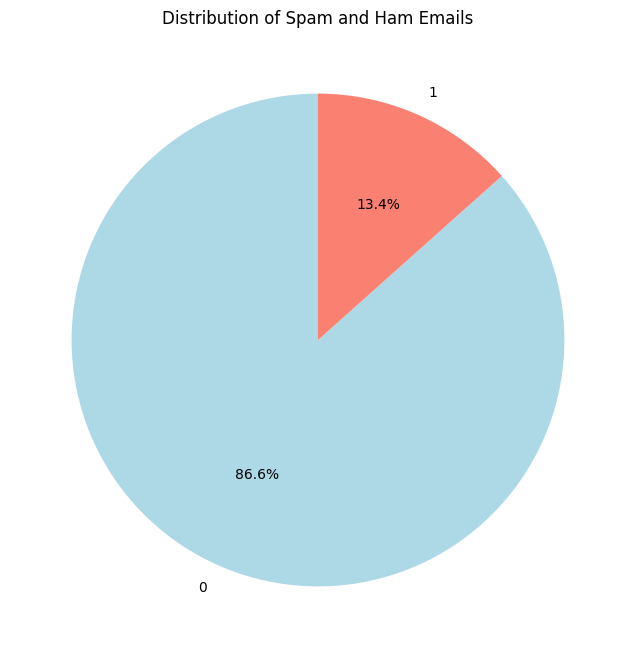

In [ ]:
plt.figure(figsize=(8, 8))  # Set the figure size for the pie chart
df_cleaned['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])  # Create a pie chart for label distribution
plt.title('Distribution of Spam and Ham Emails')  # Set the title of the pie chart
plt.ylabel('')  # Hide the y-label
plt.savefig('/content/spam_pie_chart.pdf')  # Save the pie chart as a PDF
plt.show()  # Display the pie chart

In [ ]:
# Histograms of message lengths

In [ ]:
df_cleaned['message_length'] = df_cleaned['message'].apply(len)  # Calculate message lengths and add as a new column


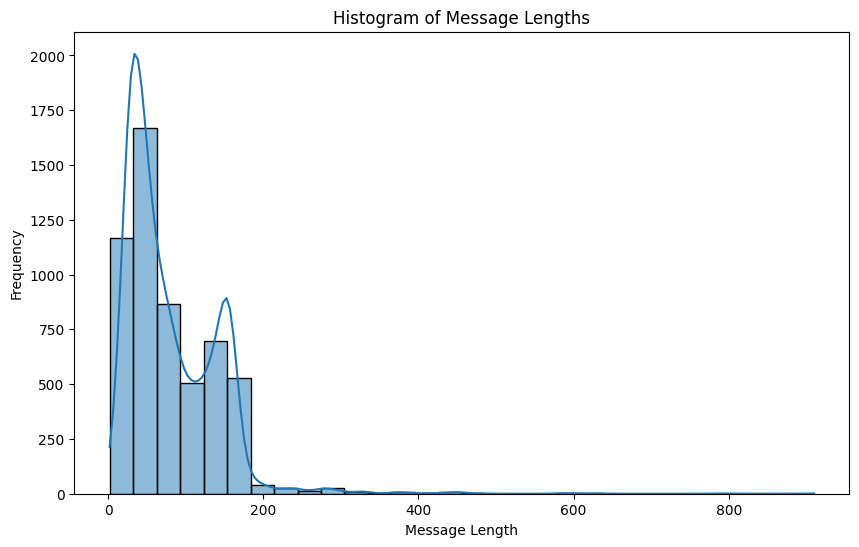

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size for the histogram
sns.histplot(df_cleaned['message_length'], bins=30, kde=True)  # Create a histogram of message lengths
plt.title('Histogram of Message Lengths')  # Set the title of the histogram
plt.xlabel('Message Length')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.savefig('/content/message_length_histogram.pdf')  # Save the histogram as a PDF
plt.show()  # Display the histogram

In [ ]:
# Heatmap for missing values

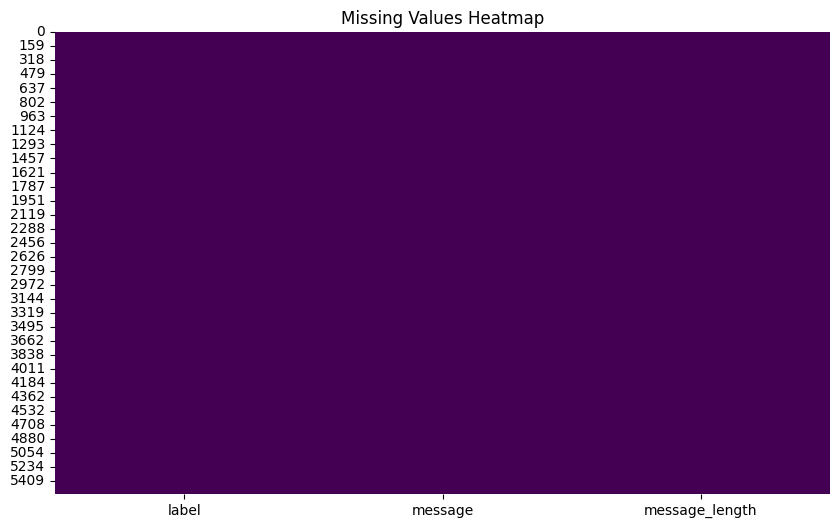

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size for the heatmap
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')  # Create a heatmap for missing values
plt.title('Missing Values Heatmap')  # Set the title of the heatmap
plt.savefig('/content/missing_values_heatmap.pdf')  # Save the heatmap as a PDF
plt.show()  # Display the heatmap

In [ ]:
# Violins for message length by label

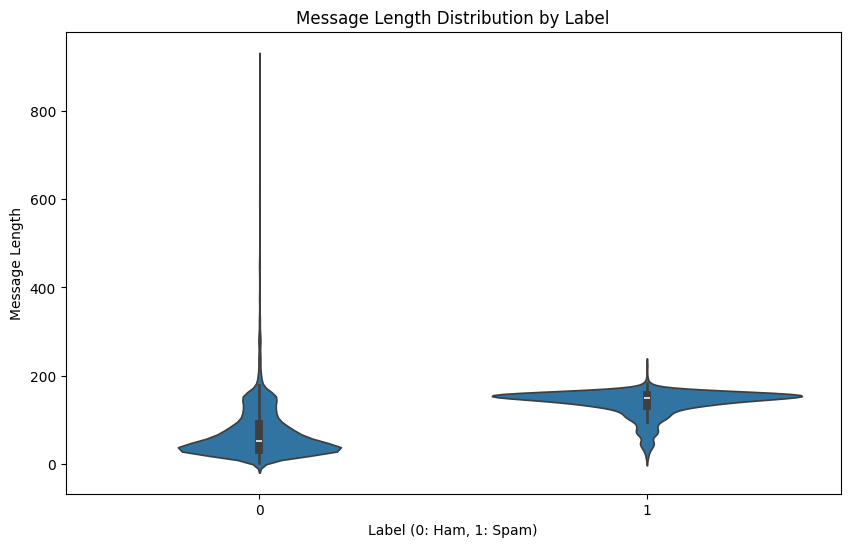

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size for the violin plot
sns.violinplot(x='label', y='message_length', data=df_cleaned)  # Create a violin plot for message length by label
plt.title('Message Length Distribution by Label')  # Set the title of the violin plot
plt.xlabel('Label (0: Ham, 1: Spam)')  # Set the x-axis label
plt.ylabel('Message Length')  # Set the y-axis label
plt.savefig('/content/message_length_violin.pdf')  # Save the violin plot as a PDF
plt.show()  # Display the violin plot

In [ ]:
#  Box Plot of Message Lengths by Label

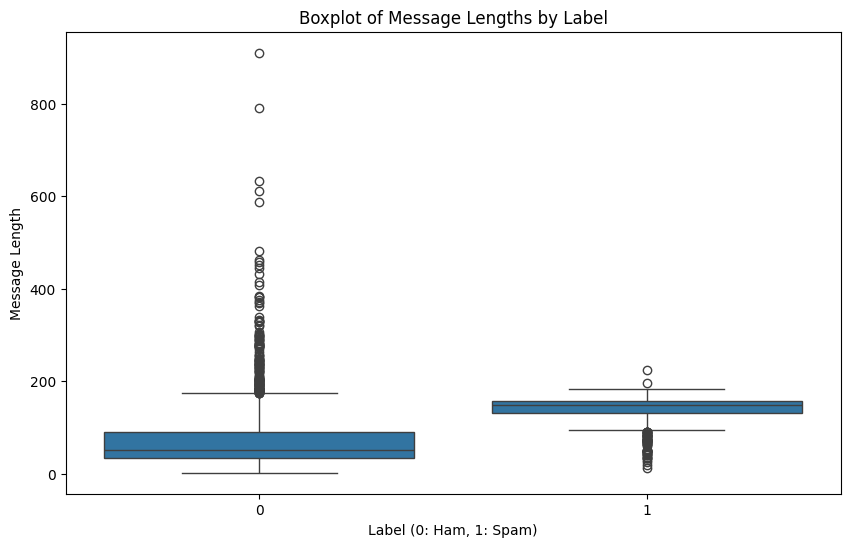

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.boxplot(x='label', y='message_length', data=df_cleaned)  # Create a box plot for message length by label
plt.title('Boxplot of Message Lengths by Label')  # Set the title of the plot
plt.xlabel('Label (0: Ham, 1: Spam)')  # Set the x-axis label
plt.ylabel('Message Length')  # Set the y-axis label
plt.savefig('/content/message_length_boxplot.pdf')  # Save the box plot as a PDF
plt.show()  # Display the box plot

In [ ]:
# Distribution of Message Lengths

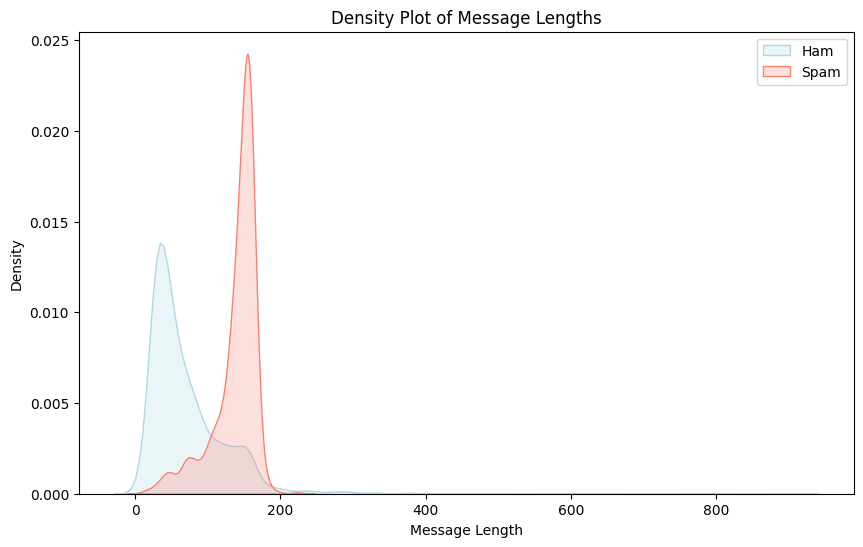

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size for the density plot
sns.kdeplot(df_cleaned[df_cleaned['label'] == 0]['message_length'], label='Ham', color='lightblue', fill=True)  # Density plot for ham messages
sns.kdeplot(df_cleaned[df_cleaned['label'] == 1]['message_length'], label='Spam', color='salmon', fill=True)  # Density plot for spam messages
plt.title('Density Plot of Message Lengths')  # Set the title of the plot
plt.xlabel('Message Length')  # Set the x-axis label
plt.ylabel('Density')  # Set the y-axis label
plt.legend()  # Display legend
plt.savefig('/content/message_length_density_plot.pdf')  # Save the density plot as a PDF
plt.show()  # Display the density plot

In [ ]:
# Word Cloud

In [ ]:
# Generate word cloud for spam messages

In [ ]:
spam_words = ' '.join(df_cleaned[df_cleaned['label'] == 1]['message'])  # Combine spam messages into a single string


In [ ]:
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_words)  # Create word cloud


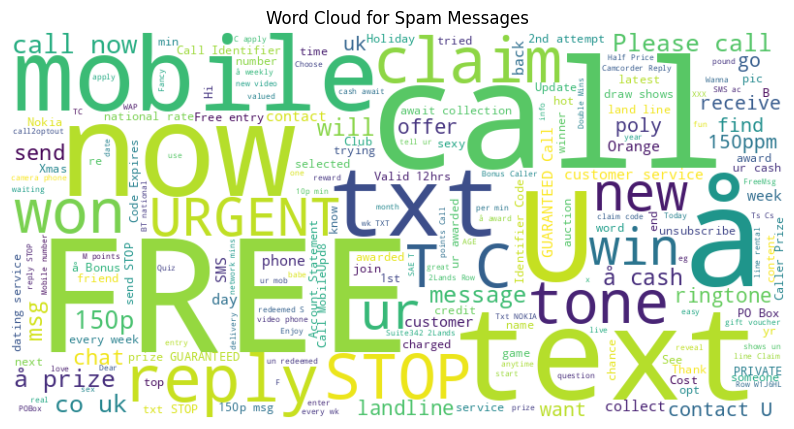

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.imshow(wordcloud_spam, interpolation='bilinear')  # Display the word cloud
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Spam Messages')  # Set the title of the plot
plt.savefig('/content/spam_wordcloud.pdf')  # Save the word cloud as a PDF
plt.show()  # Display the word cloud

In [ ]:
# Bar Chart of Top Words

In [ ]:
# Count words in spam and ham messages

In [ ]:
spam_counts = Counter(' '.join(df_cleaned[df_cleaned['label'] == 1]['message']).split())  # Count words in spam messages


In [ ]:
ham_counts = Counter(' '.join(df_cleaned[df_cleaned['label'] == 0]['message']).split())  # Count words in ham messages


In [ ]:
# Get the most common words

In [ ]:
spam_top_words = spam_counts.most_common(20)  # Get top 20 words in spam

In [ ]:
ham_top_words = ham_counts.most_common(20)  # Get top 20 words in ham

In [ ]:
# Create DataFrames for plotting

In [ ]:
spam_df = pd.DataFrame(spam_top_words, columns=['word', 'count'])  # Create DataFrame for spam words

In [ ]:
ham_df = pd.DataFrame(ham_top_words, columns=['word', 'count'])  # Create DataFrame for ham words

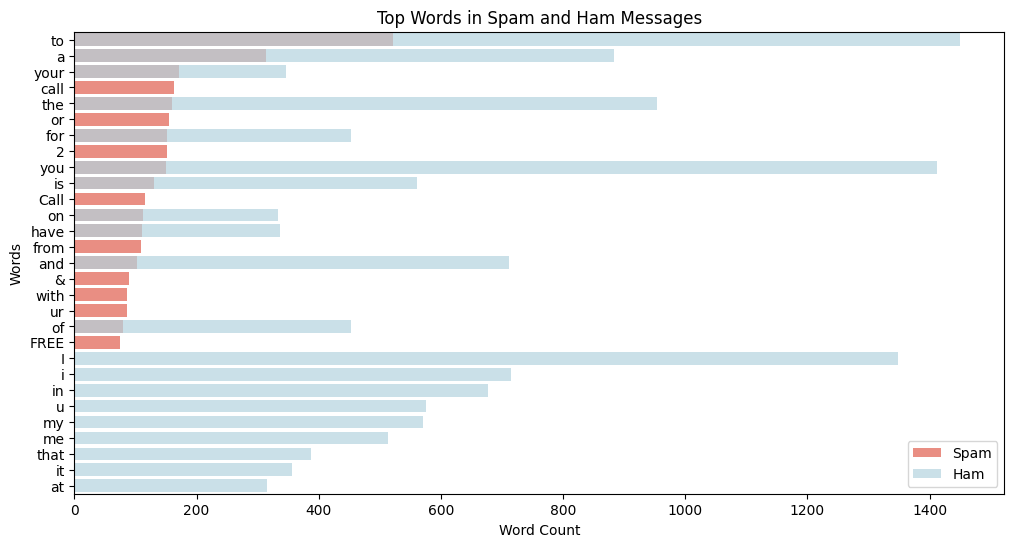

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
sns.barplot(x='count', y='word', data=spam_df, color='salmon', label='Spam')  # Bar plot for spam words
sns.barplot(x='count', y='word', data=ham_df, color='lightblue', label='Ham', alpha=0.7)  # Bar plot for ham words
plt.title('Top Words in Spam and Ham Messages')  # Set the title of the plot
plt.xlabel('Word Count')  # Set the x-axis label
plt.ylabel('Words')  # Set the y-axis label
plt.legend()  # Display legend
plt.savefig('/content/top_words_bar_chart.pdf')  # Save the bar chart as a PDF
plt.show()  # Display the bar chart

In [ ]:
# Remove duplicates

In [ ]:
df_cleaned = df_cleaned.drop_duplicates()  # Remove duplicate rows from the cleaned DataFrame

In [ ]:
# Check for outliers in message length

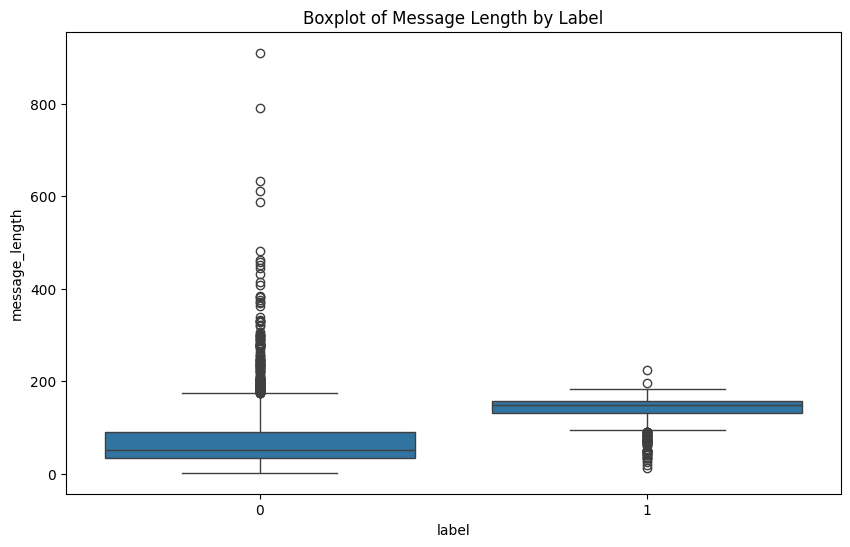

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size for the boxplot
sns.boxplot(x='label', y='message_length', data=df_cleaned)  # Create a boxplot for message length by label
plt.title('Boxplot of Message Length by Label')  # Set the title of the boxplot
plt.savefig('/content/message_length_boxplot.pdf')  # Save the boxplot as a PDF
plt.show()  # Display the boxplot

In [ ]:
# Prepare data for modeling

In [ ]:
X = df_cleaned['message']  # Define features (messages)

In [ ]:
y = df_cleaned['label']  # Define target variable (labels)

In [ ]:
# Split the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data into training and testing sets


In [ ]:
# Vectorize the text

In [ ]:
vectorizer = CountVectorizer()  # Initialize the CountVectorizer

In [ ]:
X_train_vec = vectorizer.fit_transform(X_train)  # Fit and transform training messages

In [ ]:
X_test_vec = vectorizer.transform(X_test)  # Transform testing messages

In [ ]:
# Create message lengths for training and testing sets

In [ ]:
X_train_length = X_train.apply(len).values.reshape(-1, 1)  # Calculate lengths of training messages

In [ ]:
X_test_length = X_test.apply(len).values.reshape(-1, 1)  # Calculate lengths of testing messages

In [ ]:
# Scale the message lengths

In [ ]:
scaler = StandardScaler()  # Initialize the StandardScaler

In [ ]:
X_train_length_scaled = scaler.fit_transform(X_train_length)  # Scale training message lengths

In [ ]:
X_test_length_scaled = scaler.transform(X_test_length)  # Scale testing message lengths

In [ ]:
# Combine text vectors with message lengths

In [ ]:
X_train_combined = sp.hstack((X_train_vec, X_train_length_scaled))  # Combine training text vectors and lengths

In [ ]:
X_test_combined = sp.hstack((X_test_vec, X_test_length_scaled))  # Combine testing text vectors and lengths

In [ ]:
# Train the SVM model

In [ ]:
svm_model = SVC(kernel='linear')  # Initialize the Support Vector Classifier

In [ ]:
svm_model.fit(X_train_combined, y_train)  # Fit the model on the training data

SVC(kernel='linear')

In [ ]:
# Make predictions

In [ ]:
y_pred = svm_model.predict(X_test_combined)  # Predict labels for the testing data

In [ ]:
# Evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy of the predictions

In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")  # Print the accuracy

Accuracy: 98.74%


In [ ]:
print("\nClassification Report:")  # Print a message before the classification report
print(classification_report(y_test, y_pred))  # Print the classification report


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.99      0.92      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [ ]:
# Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix

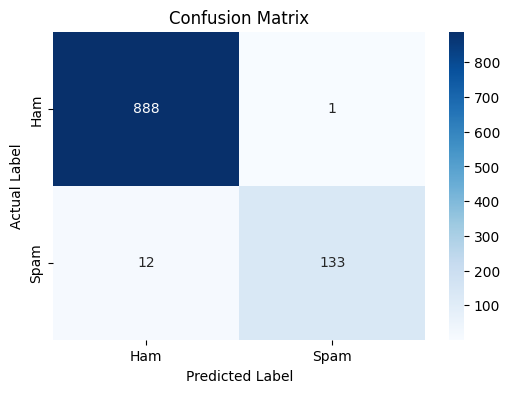

In [ ]:
plt.figure(figsize=(6, 4))  # Set the figure size for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])  # Create a heatmap for the confusion matrix
plt.title('Confusion Matrix')  # Set the title of the confusion matrix
plt.ylabel('Actual Label')  # Set the y-axis label
plt.xlabel('Predicted Label')  # Set the x-axis label
plt.savefig('/content/confusion_matrix.pdf')  # Save the confusion matrix as a PDF
plt.show()  # Display the confusion matrix

In [ ]:
# Save classification report and accuracy to CSV

In [ ]:
classification_report_dict = classification_report(y_test, y_pred, output_dict=True)  # Generate classification report as a dictionary


In [ ]:
df_report = pd.DataFrame(classification_report_dict).transpose()  # Convert the report into a DataFrame

In [ ]:
df_report['accuracy'] = accuracy  # Add accuracy to the DataFrame

In [ ]:
df_report.to_csv('/content/spam_classification_report.csv', index=False)  # Save the report as a CSV file

In [ ]:
print("\nClassification report and accuracy saved to CSV file.")  # Print a message indicating save completion


Classification report and accuracy saved to CSV file.
